<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABD/blob/main/%D0%9D%D0%A1_%D0%BB%D0%BE%D0%B3_%D0%BE%D0%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

НС_лог_оп

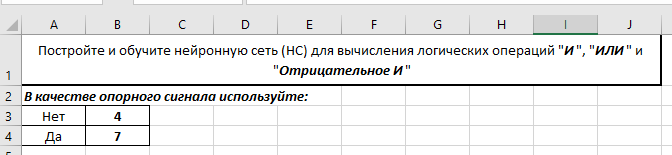

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Опорные сигналы для обучения
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
target_and = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)  # Логическое "И"
target_or = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)   # Логическое "ИЛИ"
target_nand = torch.tensor([[1], [1], [1], [0]], dtype=torch.float32)  # Логическое "Отрицательное И"

# Определение класса нейронной сети
class LogicGateNN(nn.Module):
    def __init__(self):
        super(LogicGateNN, self).__init__()
        self.fc = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

# Обучение модели
def train_model(model, criterion, optimizer, inputs, targets, epochs=1000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 100 == 0:
            print(f'Эпоха [{epoch + 1}/{epochs}], Потери: {loss.item():.4f}')

# Создание экземпляра модели
model_and = LogicGateNN()
model_or = LogicGateNN()
model_nand = LogicGateNN()

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer_and = optim.SGD(model_and.parameters(), lr=0.1)
optimizer_or = optim.SGD(model_or.parameters(), lr=0.1)
optimizer_nand = optim.SGD(model_nand.parameters(), lr=0.1)

# Обучение моделей для каждой логической операции
print("Обучение модели для логической операции И:")
train_model(model_and, criterion, optimizer_and, inputs, target_and)
print("\nОбучение модели для логической операции ИЛИ:")
train_model(model_or, criterion, optimizer_or, inputs, target_or)
print("\nОбучение модели для логической операции Отрицательное И:")
train_model(model_nand, criterion, optimizer_nand, inputs, target_nand)

# Тестирование моделей
test_inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

print("\nТестирование моделей:")
for a, b in test_inputs:
    print(f"{int(a)} и {int(b)} = {model_and(torch.tensor([[a, b]])).item():.0f}")
    print(f"{int(a)} или {int(b)} = {model_or(torch.tensor([[a, b]])).item():.0f}")
    print(f"{int(a)} и не {int(b)} = {model_nand(torch.tensor([[a, b]])).item():.0f}")

Обучение модели для логической операции И:
Эпоха [100/1000], Потери: 0.1796
Эпоха [200/1000], Потери: 0.1467
Эпоха [300/1000], Потери: 0.1235
Эпоха [400/1000], Потери: 0.1069
Эпоха [500/1000], Потери: 0.0943
Эпоха [600/1000], Потери: 0.0844
Эпоха [700/1000], Потери: 0.0764
Эпоха [800/1000], Потери: 0.0697
Эпоха [900/1000], Потери: 0.0641
Эпоха [1000/1000], Потери: 0.0592

Обучение модели для логической операции ИЛИ:
Эпоха [100/1000], Потери: 0.1173
Эпоха [200/1000], Потери: 0.0973
Эпоха [300/1000], Потери: 0.0829
Эпоха [400/1000], Потери: 0.0715
Эпоха [500/1000], Потери: 0.0623
Эпоха [600/1000], Потери: 0.0549
Эпоха [700/1000], Потери: 0.0488
Эпоха [800/1000], Потери: 0.0438
Эпоха [900/1000], Потери: 0.0395
Эпоха [1000/1000], Потери: 0.0359

Обучение модели для логической операции Отрицательное И:
Эпоха [100/1000], Потери: 0.1650
Эпоха [200/1000], Потери: 0.1366
Эпоха [300/1000], Потери: 0.1165
Эпоха [400/1000], Потери: 0.1017
Эпоха [500/1000], Потери: 0.0903
Эпоха [600/1000], Потери: 